In [1]:
WIDTH = 128
HEIGHT = 128
DATA_PATH = "./datasets/nyu2/nyu2_test.csv"
MODEL_NAME = "model_resnet_1708450819.keras"
SAMPLES_COUNT = 5

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import cv2

In [3]:
%run utils/datasets.ipynb

In [4]:
img_dm_pairs = read_csv(DATA_PATH)
labels = {i: j for i,j in img_dm_pairs}
test_paths = [i for i, j in img_dm_pairs]
print(len(test_paths))
parent_folder = DATA_PATH.rsplit('/', 1)[0]
partition = {'test': test_paths}

15


In [5]:
x_test = np.empty((len(test_paths), HEIGHT, WIDTH, 3))
y_test = np.empty((len(test_paths), HEIGHT, WIDTH, 1))

for i, ID in enumerate(partition['test'][:]):
    x_test[i, ] = preprocess_image(ID, HEIGHT, WIDTH, depth=False, horizontal_flip=False)
    y_test[i, ] = preprocess_image(labels[ID], HEIGHT, WIDTH, depth=True, horizontal_flip=False)

In [6]:
model = tf.keras.models.load_model(MODEL_NAME, compile=False) # only for prediction

3/3 [==============================] - 3s 75ms/step


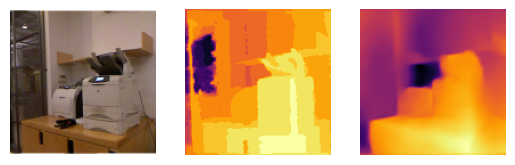

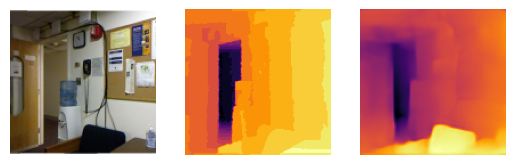

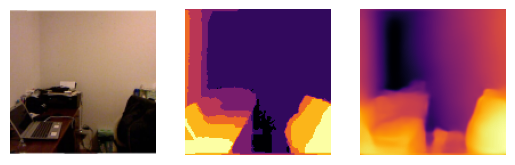

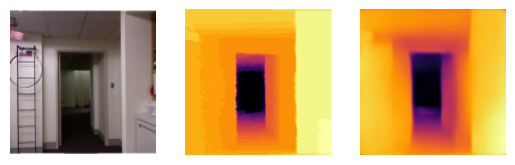

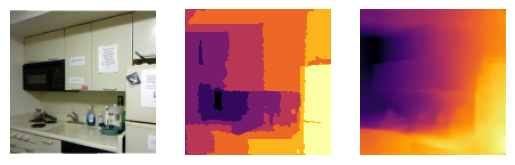

In [7]:
ixs = list(range(len(x_test)))
random.shuffle(ixs)
ixs = ixs[:SAMPLES_COUNT]
preds = model.predict(x_test[ixs], batch_size=2)
for i in range(SAMPLES_COUNT):
    path = partition['test'][ixs[i]]
    label_path = labels[path]
    pred = preds[i]

    plt.subplot(1, 3, 1)
    plt.axis("off")
    img1 = preprocess_image(path, HEIGHT, WIDTH, depth=False, horizontal_flip=False)
    img1 = cv2.cvtColor((img1 * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img1)

    plt.subplot(1, 3, 2)
    plt.axis("off")
    img = preprocess_image(label_path, HEIGHT, WIDTH, depth=True, horizontal_flip=False)
    plt.imshow(img, cmap=plt.get_cmap('inferno_r'))

    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(pred, cmap=plt.get_cmap('inferno_r'))

    plt.show()